In [1]:
%matplotlib inline

# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [2]:
import matplotlib.pyplot as plt
import fastf1.plotting
from fastf1 import utils


fastf1.Cache.enable_cache('cache')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
piloto1 = input('Piloto 1: ')
piloto2 = input('Piloto 2: ')

Año: 2022
Round: 14
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: RUS
Piloto 2: SAI


In [4]:
# load a session and its telemetry data
session = fastf1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '24', '4', '31', '16', '1', '77', '20', '6', '5', '18', '10', '3', '23', '63', '44', '14', '11', '47', '22']


First, we select the two laps that we want to compare



In [5]:
driver1_lap = session.laps.pick_driver(piloto1).pick_fastest()
driver2_lap = session.laps.pick_driver(piloto2).pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [6]:
driver1_tel = driver1_lap.get_car_data().add_distance()
driver2_tel = driver2_lap.get_car_data().add_distance()

In [7]:
delta_time, ref_tel , compare_tel = utils.delta_time(driver2_lap,driver1_lap )


Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



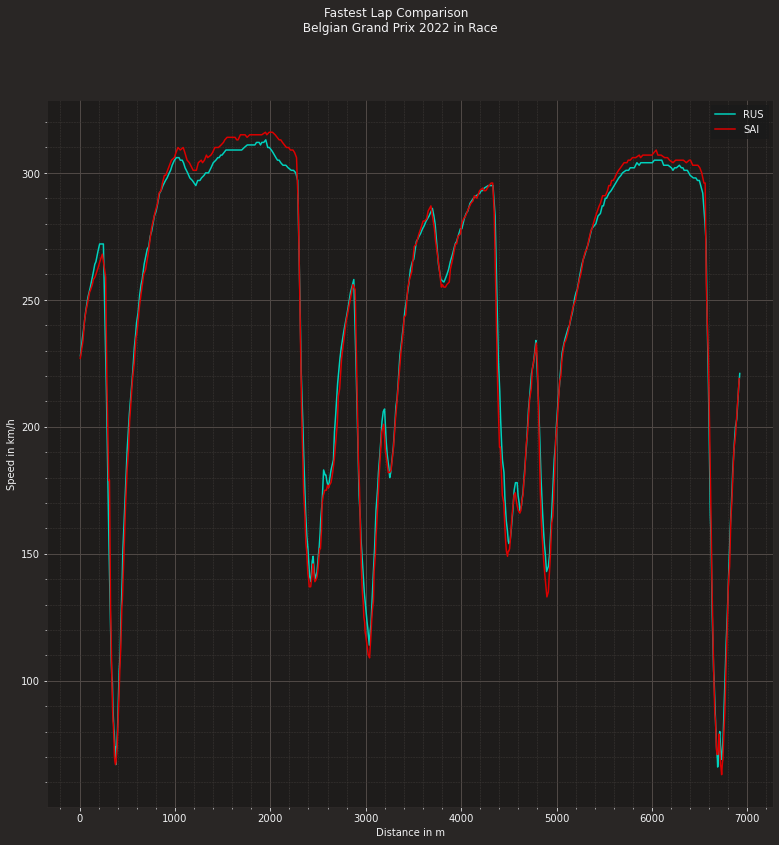

In [15]:
team1_color = fastf1.plotting.team_color(driver1_lap['Team'])
team2_color = fastf1.plotting.team_color(driver2_lap['Team'])

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [13, 13]

ax.plot(driver1_tel['Distance'], driver1_tel['Speed'], color=team1_color, label=piloto1)
ax.plot(driver2_tel['Distance'], driver2_tel['Speed'], color=team2_color, label=piloto2)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} in Race")

#plt.savefig('2022-11-FLC-VER-LEC.png')
nombrearchivo = str(year)+'-'+str(wknd)+'-FLC-'+ses+'-'+piloto1+'vs'+piloto2+'.png'
plt.savefig(nombrearchivo)
plt.show()